In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse

import utils
import settings
plt.style.use('spectrum.mplstyle')

In [2]:
energies = [1, 2.1, 3]
errors = [0.1, 0.2,0.15]

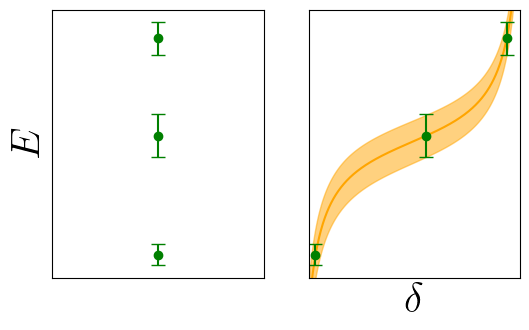

In [3]:
fig, axes = plt.subplots(1,2) #
fig.set_figwidth(6)
fig.set_figheight(4)

ax0 = axes[0]
format_index = 0
ax0.errorbar(x=[0]*len(energies), y=energies, yerr=errors,capsize=5, color=settings.colors[format_index], marker=settings.markers[format_index], linewidth=0.0, elinewidth=1.5)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_ylabel('$E$')
ymin,ymax = ax0.get_ylim()

ax1 = axes[1]
x = np.linspace(0,6,1000)
y = 0.3*np.tan(0.9*x-0.44*np.pi)+np.pi*0.65
ax1.set_xlim(0,np.pi)
ax1.set_ylim(ymin,ymax)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel(r'$\delta$')
px = []
for energy in energies:
    px.append(x[np.where(y>energy)[0][0]-1])
ax1.plot(x,y,color='orange')
y1 = 0.29*np.tan(0.9*x-0.44*np.pi)+np.pi*0.71
y2 = 0.31*np.tan(0.9*x-0.44*np.pi)+np.pi*0.585
ax1.fill_between(x,y1,y2,color='orange',alpha=0.5)
ax1.errorbar(x=px, y=energies, yerr=errors,capsize=5, color=settings.colors[format_index], marker=settings.markers[format_index], linewidth=0.0, elinewidth=1.5)


plt.tight_layout()
plt.savefig("phase_shift_fit_diagram.pdf",transparent=True)
plt.savefig("phase_shift_fit_diagram.png",transparent=True)

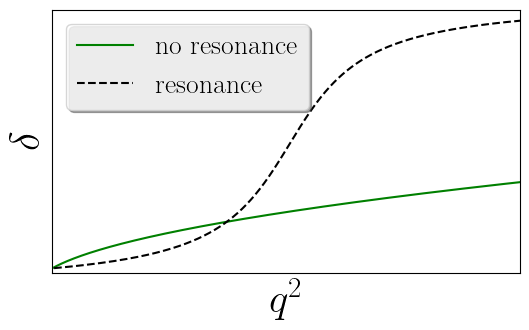

In [9]:
fig, axes = plt.subplots(1,1) #
fig.set_figwidth(6)
fig.set_figheight(4)
ax2 = axes
x=np.linspace(ymin, ymax, 1000)
y=0.4*np.pi/np.sqrt(ymax-ymin)*np.sqrt(x-ymin+0.1)-0.2
# print(x, y)
ax2.plot(x,y,color='green', label="no resonance")

x = np.linspace(0,6,1000)
y = 0.3*np.tan(0.9*x-0.44*np.pi)+np.pi*0.65
ax2.set_xlim(ymin,ymax)
ax2.set_ylim(0,np.pi)
ax2.set_ylabel(r'$\delta$')
ax2.set_xlabel('$q^2$')
ax2.plot(y,x,color='black', ls="dashed", label="resonance")

ax2.set_xticks([])
ax2.set_yticks([])
# ax2.fill_betweenx(x,y1,y2,color='orange',alpha=0.5)
# ax2.errorbar(x=energies, y=px, xerr=errors,capsize=5, color=settings.colors[format_index], marker=settings.markers[format_index], linewidth=0.0, elinewidth=1.5)
plt.legend()
plt.tight_layout()
plt.savefig("phase_shift_fit_diagram2.pdf",transparent=True)
plt.savefig("phase_shift_fit_diagram2.png",transparent=True)

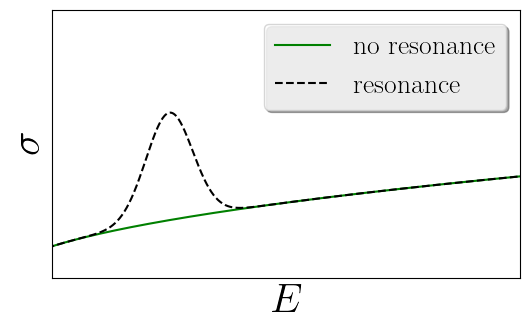

In [5]:
fig, axes = plt.subplots(1,1) #
fig.set_figwidth(6)
fig.set_figheight(4)
ax2 = axes
ax2.set_xlim(1,3)
ax2.set_ylim(0,np.pi)
ax2.set_ylabel(r'$\sigma$')
ax2.set_xlabel('$E$')
# ax2.plot(y,x,color='green', label="resonance")
x=np.linspace(ymin, ymax, 1000)
y=0.4*np.pi/np.sqrt(ymax-ymin)*np.sqrt(x-ymin)
ax2.plot(x,y,color='green', ls="solid", label="no resonance")
ax2.set_xticks([])
ax2.set_yticks([])

sigma = 0.1
mu = 1.5
y2 = np.sqrt(1.0/(2.0*np.pi*sigma))*np.exp(-(x-mu)**2/2.0/sigma/sigma)
ax2.plot(x,y+y2,color='black', ls="dashed", label="resonance")

plt.legend()
plt.tight_layout()
plt.savefig("cross_section.pdf",transparent=True)
plt.savefig("cross_section.png",transparent=True)